In [8]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel("Project_Data_complete_V2.xlsx")

In [48]:
data = df.copy()

In [98]:
data.head(6)

,Erfassdatum,KampagnenStartDatum,Kunde,Verantwortlicher,Mitarbeiter 1,Mitarbeiter 2,Mitarbeiter 3,Mitarbeiter 4,Mitarbeiter 5,Mitarbeiter 6,...,Plattform,Auszug_Keywords_List,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Remote-Kampagne,komplett abgerechnet,Restbetrag,Einnahmen,gewinn
0,2020-01-28 09:00:00,2020-01-23 09:00:00,VW,Peter Müller,Clara Lieblich,NaN,NaN,NaN,NaN,NaN,...,Twitter,"VW, Volkwasgen, Auto, Das Auto, Aus Liebe zum ...",3.207499e+05,1411,110,Nein,Ja,0.0,7930,782.39
1,2020-01-23 00:00:00,2020-01-27 00:00:00,Skoda,Dietrich Adler,Hans Vogel,Theo Charisius,Jonas Wild,Bert Hamm,NaN,NaN,...,Twitter,"Skoda, Fabia, Citigo, Simply Clever, Immmer be...",4.091738e+05,3028,480,Nein,Ja,0.0,14530,1558.92
2,2020-01-23 22:00:00,2020-01-25 22:00:00,AUDI,Agatha Klein,Phillip Fries,NaN,NaN,NaN,NaN,NaN,...,Twitter,"Audi, Vorsprung durch Technik, A3, A4, A6, TT,...",8.569617e+05,5227,243,Ja,Ja,0.0,12270,1598.65
3,2020-01-27 00:00:00,2020-01-31 00:00:00,Pepsi,Dietrich Adler,Clara Lieblich,NaN,NaN,NaN,NaN,NaN,...,Twitter,"Pepsi, Pepsi Co., Live For now, Change the gam...",1.467504e+06,14235,21,Nein,Ja,0.0,11650,1429.95
4,2020-01-26 00:00:00,2020-01-29 00:00:00,Bayer AG,Rudolf Herzog,NaN,NaN,NaN,NaN,NaN,NaN,...,Twitter,"Bayer, Bayer AG, Leverkusen, Werner Baumann, S...",1.676234e+06,11231,0,Nein,Ja,0.0,11600,660.38
5,2020-02-02 00:00:00,2020-02-04 00:00:00,Deutsche Börse,Peter Müller,Lynn Hagerer,NaN,NaN,NaN,NaN,NaN,...,Twitter,"Deutsche Börse, Börse, Aktien, We make markets...",8.708781e+05,6183,182,Ja,Ja,0.0,18030,2484.84


In [65]:
data.shape

(686, 24)

In [66]:
data.corr()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Dauer in Tagen,1.000000,0.893713,0.072789,0.040991,0.039190,0.725219,0.005415,0.559144,0.097160
Kosten Personal,0.893713,1.000000,0.064486,0.043781,0.032690,0.787611,0.009458,0.607670,0.090894
Kosten Ads,0.072789,0.064486,1.000000,0.769434,0.680952,0.073214,0.040889,0.741580,0.101305
Ad Impressions,0.040991,0.043781,0.769434,1.000000,0.895839,0.022693,-0.003930,0.590474,0.139859
Clicks auf Ads,0.039190,0.032690,0.680952,0.895839,1.000000,0.012586,0.009417,0.523419,0.134721
Veröffentlichte Tweets,0.725219,0.787611,0.073214,0.022693,0.012586,1.000000,0.012743,0.497192,0.081199
Restbetrag,0.005415,0.009458,0.040889,-0.003930,0.009417,0.012743,1.000000,-0.186799,-0.590682
Einnahmen,0.559144,0.607670,0.741580,0.590474,0.523419,0.497192,-0.186799,1.000000,0.487195
gewinn,0.097160,0.090894,0.101305,0.139859,0.134721,0.081199,-0.590682,0.487195,1.000000


In [51]:
# Find the percentage of missing values sorted by highest to lowest % Goibibo
(data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100).sort_values(ascending=False)

Mitarbeiter 7             76.093294
Mitarbeiter 6             64.577259
Mitarbeiter 5             39.795918
Mitarbeiter 4             17.930029
Mitarbeiter 3             15.451895
Mitarbeiter 1             14.285714
Mitarbeiter 2              8.746356
Verantwortlicher           0.291545
Dauer in Tagen             0.000000
Kunde                      0.000000
KampagnenStartDatum        0.000000
Kosten Personal            0.000000
Kosten Ads                 0.000000
Plattform                  0.000000
Auszug_Keywords_List       0.000000
komplett abgerechnet       0.000000
Clicks auf Ads             0.000000
Veröffentlichte Tweets     0.000000
Remote-Kampagne            0.000000
Restbetrag                 0.000000
Ad Impressions             0.000000
Erfassdatum                0.000000
Einnahmen                  0.000000
dtype: float64

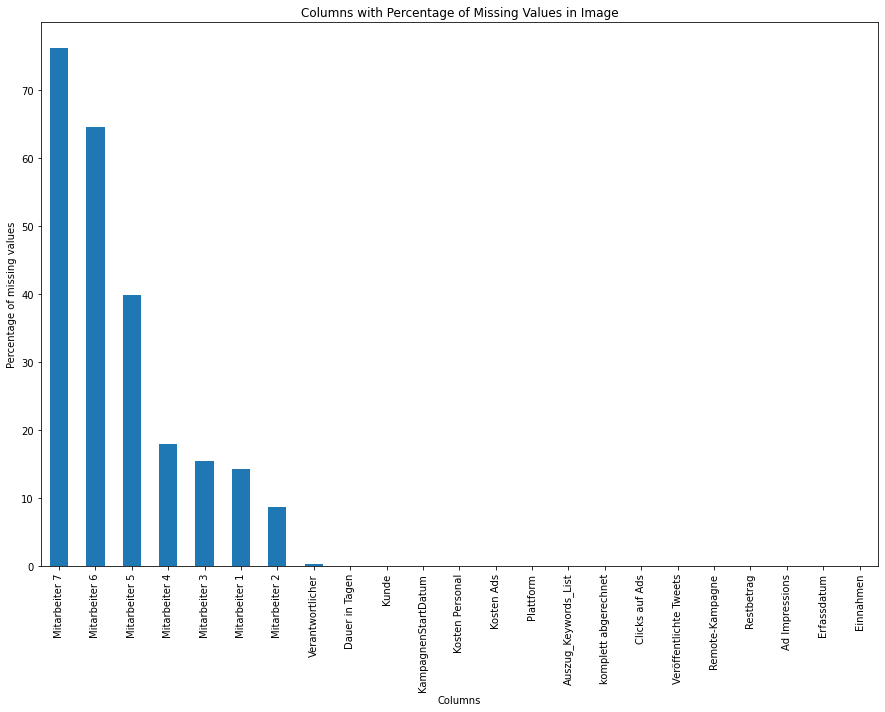

In [52]:
# Plot columns with missing values to evaluate how many are missing
fig, ax = plt.subplots()
(data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100).sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
ax.set_xlabel("Columns")
ax.set_ylabel("Percentage of missing values")
ax.set_title("Columns with Percentage of Missing Values in Image")
plt.show()

In [53]:
data.describe()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen
count,686.000000,686.000000,686.000000,6.860000e+02,686.000000,686.000000,686.000000,686.000000
mean,14.090379,4042.965015,5985.153713,7.554281e+05,5061.911079,396.250729,180.692117,10545.816327
std,7.977925,2571.820856,3245.418104,5.146498e+05,3819.745431,311.326348,1124.320177,4845.648284
min,1.000000,205.000000,446.472000,4.869138e+04,200.000000,0.000000,0.000000,310.000000
25%,7.000000,1872.000000,3238.398600,3.562887e+05,2287.500000,144.000000,0.000000,6807.500000
50%,14.000000,3803.000000,5868.974400,6.583198e+05,3990.000000,315.000000,0.000000,10285.000000
75%,21.000000,5715.500000,8727.390000,1.059037e+06,6882.000000,585.000000,0.000000,13947.500000
max,28.000000,12264.000000,12476.150400,2.478627e+06,23149.000000,1575.000000,13267.104000,26470.000000


In [54]:
# Datentypen erfahren
data.dtypes

Erfassdatum               datetime64[ns]
KampagnenStartDatum       datetime64[ns]
Kunde                             object
Verantwortlicher                  object
Mitarbeiter 1                     object
Mitarbeiter 2                     object
Mitarbeiter 3                     object
Mitarbeiter 4                     object
Mitarbeiter 5                     object
Mitarbeiter 6                     object
Mitarbeiter 7                     object
Dauer in Tagen                     int64
Kosten Personal                    int64
Kosten Ads                       float64
Plattform                         object
Auszug_Keywords_List              object
Ad Impressions                   float64
Clicks auf Ads                     int64
Veröffentlichte Tweets             int64
Remote-Kampagne                   object
komplett abgerechnet              object
Restbetrag                       float64
Einnahmen                          int64
dtype: object

In [55]:
# die Null-Werte abschätzen
data.isnull().sum()

Erfassdatum                 0
KampagnenStartDatum         0
Kunde                       0
Verantwortlicher            2
Mitarbeiter 1              98
Mitarbeiter 2              60
Mitarbeiter 3             106
Mitarbeiter 4             123
Mitarbeiter 5             273
Mitarbeiter 6             443
Mitarbeiter 7             522
Dauer in Tagen              0
Kosten Personal             0
Kosten Ads                  0
Plattform                   0
Auszug_Keywords_List        0
Ad Impressions              0
Clicks auf Ads              0
Veröffentlichte Tweets      0
Remote-Kampagne             0
komplett abgerechnet        0
Restbetrag                  0
Einnahmen                   0
dtype: int64

In [56]:
# Gewinn berechnen
data['gewinn'] = data['Einnahmen'] - data['Kosten Personal'] - data['Kosten Ads']

In [57]:
data.describe()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
count,686.000000,686.000000,686.000000,6.860000e+02,686.000000,686.000000,686.000000,686.000000,686.000000
mean,14.090379,4042.965015,5985.153713,7.554281e+05,5061.911079,396.250729,180.692117,10545.816327,517.697599
std,7.977925,2571.820856,3245.418104,5.146498e+05,3819.745431,311.326348,1124.320177,4845.648284,1798.236883
min,1.000000,205.000000,446.472000,4.869138e+04,200.000000,0.000000,0.000000,310.000000,-12849.900000
25%,7.000000,1872.000000,3238.398600,3.562887e+05,2287.500000,144.000000,0.000000,6807.500000,-345.254950
50%,14.000000,3803.000000,5868.974400,6.583198e+05,3990.000000,315.000000,0.000000,10285.000000,483.734400
75%,21.000000,5715.500000,8727.390000,1.059037e+06,6882.000000,585.000000,0.000000,13947.500000,1485.255400
max,28.000000,12264.000000,12476.150400,2.478627e+06,23149.000000,1575.000000,13267.104000,26470.000000,5768.480000


In [84]:
# Gruppierung nach den Verantwortlichen
data.groupby(['Verantwortlicher']).sum()



,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Verantwortlicher,,,,,,,,,
Agatha Klein,1944,542805,842439.9814,1.062675e+08,707049,48899,36130.666606,1419880,34635.0186
Dietrich Adler,1725,478015,732947.0286,9.451941e+07,640414,45300,9438.316804,1287460,76497.9714
Lars Ermlich,1319,370418,528870.3538,7.139582e+07,525271,33913,20812.488064,944280,44991.6462
Peter Müller,1697,446461,738659.4836,8.976759e+07,571944,46073,11528.136346,1269870,84749.5164
Rebecca Belletz,1268,415158,547811.5762,7.091658e+07,454834,41605,18977.174784,1020340,57370.4238
Rudolf Herzog,1682,515237,710420.0934,8.463696e+07,567675,55564,27068.009534,1282020,56362.9066


In [85]:
# Gruppierung nach den Kunden
data.groupby(['Kunde']).sum()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Kunde,,,,,,,,,
AUDI,1204,358494,424555.0514,5.646736e+07,371334,36717,0.000000,849130,66080.9486
Bayer AG,1253,366963,562992.7914,6.568629e+07,406227,39529,9099.138392,977600,47644.2086
DB,859,218546,424059.2530,5.217605e+07,360225,17958,11328.386728,661770,19164.7470
Deutsche Börse,854,215982,355586.7166,4.471676e+07,274288,17892,4507.959000,610620,39051.2834
EDEKA,899,248048,410628.7128,5.077756e+07,350017,22367,15624.816568,672340,13663.2872
Pepsi,1153,343349,459081.0296,6.091196e+07,422180,32759,9165.183878,844630,42199.9704
Skoda,1372,410221,571566.3636,7.393456e+07,506054,41366,44170.522852,1029450,47662.6364
Tesla,89,24943,44059.6832,5.374497e+06,43060,2881,740.796736,76800,7797.3168
Uber,833,250727,361695.3364,4.562976e+07,318828,22437,16919.046912,643220,30797.6636


In [86]:
#Gruppierung nach Verantwortlichen und gewinn
data_verantwortlicher = data.groupby(['Verantwortlicher']).sum().sort_values('gewinn', ascending=False)
data_verantwortlicher

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Verantwortlicher,,,,,,,,,
Peter Müller,1697,446461,738659.4836,8.976759e+07,571944,46073,11528.136346,1269870,84749.5164
Dietrich Adler,1725,478015,732947.0286,9.451941e+07,640414,45300,9438.316804,1287460,76497.9714
Rebecca Belletz,1268,415158,547811.5762,7.091658e+07,454834,41605,18977.174784,1020340,57370.4238
Rudolf Herzog,1682,515237,710420.0934,8.463696e+07,567675,55564,27068.009534,1282020,56362.9066
Lars Ermlich,1319,370418,528870.3538,7.139582e+07,525271,33913,20812.488064,944280,44991.6462
Agatha Klein,1944,542805,842439.9814,1.062675e+08,707049,48899,36130.666606,1419880,34635.0186


In [87]:
#Gruppierung nach Kunde und Restbetrag
data_kunden_bezahlung = data.groupby(['Kunde']).sum().sort_values('Restbetrag', ascending=False)
data_kunden_bezahlung

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Kunde,,,,,,,,,
Skoda,1372,410221,571566.3636,7.393456e+07,506054,41366,44170.522852,1029450,47662.6364
Uber,833,250727,361695.3364,4.562976e+07,318828,22437,16919.046912,643220,30797.6636
EDEKA,899,248048,410628.7128,5.077756e+07,350017,22367,15624.816568,672340,13663.2872
VW,1150,336201,491590.5090,6.254887e+07,420258,37922,12398.941072,868870,41078.4910
DB,859,218546,424059.2530,5.217605e+07,360225,17958,11328.386728,661770,19164.7470
Pepsi,1153,343349,459081.0296,6.091196e+07,422180,32759,9165.183878,844630,42199.9704
Bayer AG,1253,366963,562992.7914,6.568629e+07,406227,39529,9099.138392,977600,47644.2086
Deutsche Börse,854,215982,355586.7166,4.471676e+07,274288,17892,4507.959000,610620,39051.2834
Tesla,89,24943,44059.6832,5.374497e+06,43060,2881,740.796736,76800,7797.3168


In [63]:
# #Welcher Kunde zahlt gut? Welche zahlen öfters nicht?
# nichtbezahlt = data.loc[data['komplett abgerechnet'] == 'Nein']
# nichtbezahlt_copy = nichtbezahlt['Kunde']
# nichtbezahlt_copy.value_counts()

Skoda             7
VW                4
Bayer AG          4
DB                3
Pepsi             2
EDEKA             2
Uber              2
Deutsche Börse    1
Tesla             1
Name: Kunde, dtype: int64

In [67]:
# Gruppierung nach den Mitarbeiter_1
data.groupby(['Mitarbeiter 1']).sum()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Mitarbeiter 1,,,,,,,,,
Agatha Klein,161,42881,9.926085e+04,1.148959e+07,60839,4636,0.000000,147450,5308.1548
Clara Lieblich,1934,522536,9.340014e+05,1.108183e+08,728851,52760,31455.187760,1524560,68022.6290
Dietrich Adler,173,54376,4.801644e+04,5.657212e+06,40291,5131,0.000000,110390,7997.5592
Hans Vogel,936,200623,4.242400e+05,5.642142e+07,391464,11752,15836.345728,645700,20836.9616
Lynn Hagerer,1171,308832,4.597936e+05,6.263658e+07,436211,29755,11208.976128,805540,36914.4042
Peter Müller,18,6005,1.323696e+04,1.046321e+06,9387,430,0.000000,22740,3498.0376
Phillip Fries,1375,435187,4.847975e+05,5.807230e+07,382826,44287,9536.189796,966030,46045.5046
Rudolf Herzog,8,1976,9.527794e+03,1.323261e+06,5690,168,0.000000,14720,3216.2064
Tara Mann,2489,788878,1.042935e+06,1.384484e+08,951459,78889,28799.793992,1947690,115877.2792


In [93]:
data_mitarbeiter_1 = data.groupby(['Mitarbeiter 1']).sum().sort_values('gewinn', ascending=False)
data_mitarbeiter_1.reset_index()

,Mitarbeiter 1,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
0,Tara Mann,2489,788878,1.042935e+06,1.384484e+08,951459,78889,28799.793992,1947690,115877.2792
1,Clara Lieblich,1934,522536,9.340014e+05,1.108183e+08,728851,52760,31455.187760,1524560,68022.6290
2,Phillip Fries,1375,435187,4.847975e+05,5.807230e+07,382826,44287,9536.189796,966030,46045.5046
3,Lynn Hagerer,1171,308832,4.597936e+05,6.263658e+07,436211,29755,11208.976128,805540,36914.4042
4,Hans Vogel,936,200623,4.242400e+05,5.642142e+07,391464,11752,15836.345728,645700,20836.9616
5,Dietrich Adler,173,54376,4.801644e+04,5.657212e+06,40291,5131,0.000000,110390,7997.5592
6,Agatha Klein,161,42881,9.926085e+04,1.148959e+07,60839,4636,0.000000,147450,5308.1548
7,Peter Müller,18,6005,1.323696e+04,1.046321e+06,9387,430,0.000000,22740,3498.0376
8,Rudolf Herzog,8,1976,9.527794e+03,1.323261e+06,5690,168,0.000000,14720,3216.2064


In [69]:
data.groupby(['Mitarbeiter 2']).sum()

,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
Mitarbeiter 2,,,,,,,,,
Arnold Wege,1548,437289,748865.0692,8.952744e+07,581364,45213,26105.179660,1229890,43735.9308
Clara Lieblich,178,54600,56234.1408,5.939533e+06,38178,5649,0.000000,115680,4845.8592
Hans Vogel,127,29760,66787.4096,9.485458e+06,50882,2640,0.000000,105320,8772.5904
Jarno Millitzer,2288,724082,952853.5952,1.267776e+08,882444,72412,23542.097492,1782650,105714.4048
Lena Moll,1303,423199,464842.0754,5.606905e+07,369304,43873,4571.268696,934470,46428.9246
Lynn Hagerer,54,16058,34690.1924,3.890360e+06,27712,1512,0.000000,54000,3251.8076
Olaf Proll,1124,299529,439180.0858,6.028477e+07,417736,29006,11208.976128,771270,32560.9142
Phillip Fries,1257,383677,537799.2648,6.648062e+07,426271,41676,21946.900634,973240,51763.7352
Theo Charisius,927,198874,415217.8928,5.499698e+07,381183,11673,15836.345728,633550,19458.1072


In [95]:
data_mitarbeiter_2 = data.groupby(['Mitarbeiter 2']).sum().sort_values('gewinn', ascending=False)
data_mitarbeiter_2.reset_index()


,Mitarbeiter 2,Dauer in Tagen,Kosten Personal,Kosten Ads,Ad Impressions,Clicks auf Ads,Veröffentlichte Tweets,Restbetrag,Einnahmen,gewinn
0,Jarno Millitzer,2288,724082,952853.5952,1.267776e+08,882444,72412,23542.097492,1782650,105714.4048
1,Phillip Fries,1257,383677,537799.2648,6.648062e+07,426271,41676,21946.900634,973240,51763.7352
2,Lena Moll,1303,423199,464842.0754,5.606905e+07,369304,43873,4571.268696,934470,46428.9246
3,Arnold Wege,1548,437289,748865.0692,8.952744e+07,581364,45213,26105.179660,1229890,43735.9308
4,Olaf Proll,1124,299529,439180.0858,6.028477e+07,417736,29006,11208.976128,771270,32560.9142
5,Theo Charisius,927,198874,415217.8928,5.499698e+07,381183,11673,15836.345728,633550,19458.1072
6,Hans Vogel,127,29760,66787.4096,9.485458e+06,50882,2640,0.000000,105320,8772.5904
7,Clara Lieblich,178,54600,56234.1408,5.939533e+06,38178,5649,0.000000,115680,4845.8592
8,Lynn Hagerer,54,16058,34690.1924,3.890360e+06,27712,1512,0.000000,54000,3251.8076


In [97]:
data_mitarbeiter_2.dtypes

Dauer in Tagen              int64
Kosten Personal             int64
Kosten Ads                float64
Ad Impressions            float64
Clicks auf Ads              int64
Veröffentlichte Tweets      int64
Restbetrag                float64
Einnahmen                   int64
gewinn                    float64
dtype: object